# Laporan Analisis Dataset Hepatitis

Nama : Fathan Hudyaussie Santoso
<br>NIM : 19/446776/TK/49881

## Pendahuluan
Hepatitis adalah peradangan hati. Kondisi ini dapat sembuh sendiri atau dapat berkembang menjadi fibrosis (jaringan parut), sirosis, atau kanker hati. Virus hepatitis adalah penyebab hepatitis yang paling umum di dunia tetapi infeksi lain, zat beracun (misalnya alkohol, obat-obatan tertentu), dan penyakit autoimun juga dapat menyebabkan hepatitis.
<br><br>Ada 5 virus hepatitis utama, yang disebut sebagai tipe A, B, C, D dan E. 5 tipe ini paling mengkhawatirkan karena beban penyakit dan kematian yang ditimbulkannya serta potensi wabah dan penyebaran epidemi. Tipe B dan C menyebabkan penyakit kronis pada ratusan juta orang dan, bersama-sama, adalah penyebab paling umum dari sirosis hati dan kanker.
<br><br>Sebagian besar pasien hepatitis datang dengan tanpa gejala, seringkali dokter mendiagnosis penyakit dengan tes laboratorium seperti tes fungsi hati, tes waktu protrombin, tes histologi, atau dengan pemeriksaan fisik pasien.
<br><br>DATASET HEPATITIS UCI : 
[Sumber](https://archive.ics.uci.edu/ml/datasets/hepatitis)

## Analisis Data

In [27]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns; sns.set()

In [28]:
#Import Dataset
lbl = ['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
df = pd.read_csv("hepatitis.data", names=lbl)
df.head(5)


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

Diperoleh informasi dari dataframe diatas bahwa dataset terdiri dari 19 fitur dan 1 Class (outcome) dengan jumlah data sebanyak 155 namun ditemukan nilai "?" pada beberapa fitur sehingga dibutuhkan tracing untuk menemukan persebaran nilai "?" pada dataset.

In [30]:
df.replace("?",np.nan, inplace = True)
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

Dengan mengganti nilai "?" ke nan agar dapat melacak nilai null pada dataset, ditemukan beberapa data yang hilang dalam dataset dengan yang paling menonjol pada protrombin time (PROTIME) yang memiliki 67 data yang hilang (43%) dari 155 sedangkan sisanya dari data yang hilang terdiri dari kurang dari 10% dari keseluruhan dataset.
<br><br>Melatih model dengan kumpulan data yang memiliki banyak nilai yang hilang dapat memengaruhi kualitas model machine learning secara drastis. Karena beberapa algoritma seperti KNN mengasumsikan bahwa semua nilai adalah numerik dan memiliki dan memiliki nilai yang berarti.

Selanjutnya adalah melihat pembagian class / outcome pada dataset

In [31]:
df["Class"] = df["Class"].astype(int)

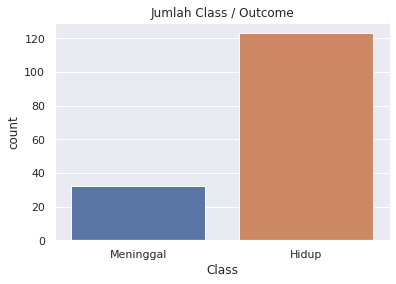

In [32]:
class_count=sns.countplot(x="Class", data=df)
plt.gca().set_xticklabels(['Meninggal','Hidup']);
class_count.set_title("Jumlah Class / Outcome")
class_count.figure.savefig('class_count.png')

Terlihat adanya ketidakseimbangan class / outcome yang terdiri dari 32 pasien meninggal (26%) dan 123 pasien hidup (74%) dari total 155 pasien. Ketidakseimbangan data dalam masalah klasifikasi memiliki efek yang signifikan dalam kualitas hasil prediksi yang diperoleh melalui model.

## Kesimpulan

Dari analisis yang sudah dilakukan terhadap dataset hepatitis, ditemukan beberapa data pada fitur tidak eksis / hilang serta hasil class / outcome yang imbalance. Dengan kondisi dataset yang tidak ideal seperti ini, maka dataset ini saya simpulkan tidak cocok untuk digunakan secara klinis seperti memprediksi tingkat persentase keberlangsungan hidup pasien.
<br><br>Namun, tugas ini memberi saya wawasan tentang pentingnya seorang ahli bidang seperti profesi medis di bidang medis berharga di dunia ilmu data. Seorang klinisi dengan pengetahuan data science akan sangat membantu dalam mengetahui fitur apa yang butuh untuk diperoleh dan memahami data yang telah diperoleh sehingga dapat dianalisis lebih lanjut yang tentunya akan sangat bermanfaat pada bidang tersebut.